# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list"  >**Heart Stroke Prediction**</h1>
# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">*Logistic Regression and KNN Classification*</h1>

Heart disease is broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred as cardiovascular diseases. 
We explore the heart disease dataset using exploratory data analysis and exercise with classification algorithms for prediction. 
The "goal" field refers to the presence of heart disease.

**For a better understanding and more information, please refer to [UCI Machine Learning Repository  Website](https://archive.ics.uci.edu/ml/datasets/heart+disease)**

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [7]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [8]:
df['slope']=df['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

In [9]:
df.thal = df.thal.map({0:np.nan, 2:'normal' , 1:'fixed defect' , 3:'reversable defect'})
df.thal

0           fixed defect
1                 normal
2                 normal
3                 normal
4                 normal
             ...        
298    reversable defect
299    reversable defect
300    reversable defect
301    reversable defect
302               normal
Name: thal, Length: 303, dtype: object

In [10]:
df.sample(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
183,58,1,non-anginal pain,112,230,0,normal,165,0,2.5,flat,1,reversable defect,0
143,67,0,typical angina,106,223,0,having ST-T wave abnormality,142,0,0.3,downsloping,2,normal,1
181,65,0,typical angina,150,225,0,normal,114,0,1.0,flat,3,reversable defect,0
188,50,1,non-anginal pain,140,233,0,having ST-T wave abnormality,163,0,0.6,flat,1,reversable defect,0
227,35,1,typical angina,120,198,0,having ST-T wave abnormality,130,1,1.6,flat,0,reversable defect,0
155,58,0,typical angina,130,197,0,having ST-T wave abnormality,131,0,0.6,flat,0,normal,1
220,63,0,typical angina,150,407,0,normal,154,0,4.0,flat,3,reversable defect,0
163,38,1,non-anginal pain,138,175,0,having ST-T wave abnormality,173,0,0.0,downsloping,4,normal,1
160,56,1,atypical angina,120,240,0,having ST-T wave abnormality,169,0,0.0,upsloping,0,normal,1
172,58,1,atypical angina,120,284,0,normal,160,0,1.8,flat,0,normal,0


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

In [13]:
df["age"].sort_values().unique()

array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 74, 76, 77], dtype=int64)

In [14]:
df.groupby(["target"])[["age"]].mean().sort_values(by="age")

,age
target,
1,52.496970
0,56.601449


In [15]:
df.groupby(["target"])[["chol"]].mean().sort_values(by="chol")

,chol
target,
1,242.230303
0,251.086957


In [16]:
df["sex"].sort_values().unique()

array([0, 1], dtype=int64)

In [17]:
df["cp"].sort_values().unique()

array(['asymptomatic', 'atypical angina', 'non-anginal pain',
       'typical angina'], dtype=object)

In [18]:
df["trestbps"].sort_values().unique()

array([ 94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117,
       118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135,
       136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156,
       160, 164, 165, 170, 172, 174, 178, 180, 192, 200], dtype=int64)

In [19]:
df["chol"].sort_values().unique()

array([126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174,
       175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192,
       193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275,
       276, 277, 278, 281, 282, 283, 284, 286, 288, 289, 290, 293, 294,
       295, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311,
       313, 315, 318, 319, 321, 322, 325, 326, 327, 330, 335, 340, 341,
       342, 353, 354, 360, 394, 407, 409, 417, 564], dtype=int64)

In [20]:
df["fbs"].sort_values().unique()

array([0, 1], dtype=int64)

In [21]:
df["restecg"].sort_values().unique()

array(['having ST-T wave abnormality', 'left ventricular hypertrophy',
       'normal'], dtype=object)

In [22]:
df["thalach"].sort_values().unique()

array([ 71,  88,  90,  95,  96,  97,  99, 103, 105, 106, 108, 109, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179,
       180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194, 195, 202],
      dtype=int64)

In [23]:
df["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [24]:

df["oldpeak"].value_counts().unique()

array([99, 17, 14, 13, 12, 11, 10,  9,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

In [25]:

df["slope"].value_counts()

downsloping    142
flat           140
upsloping       21
Name: slope, dtype: int64

In [26]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
df["ca"].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [28]:
df["thal"].value_counts()

normal               166
reversable defect    117
fixed defect          18
Name: thal, dtype: int64

In [29]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [30]:
skew(df.target)

-0.17892962380969754

<AxesSubplot:>

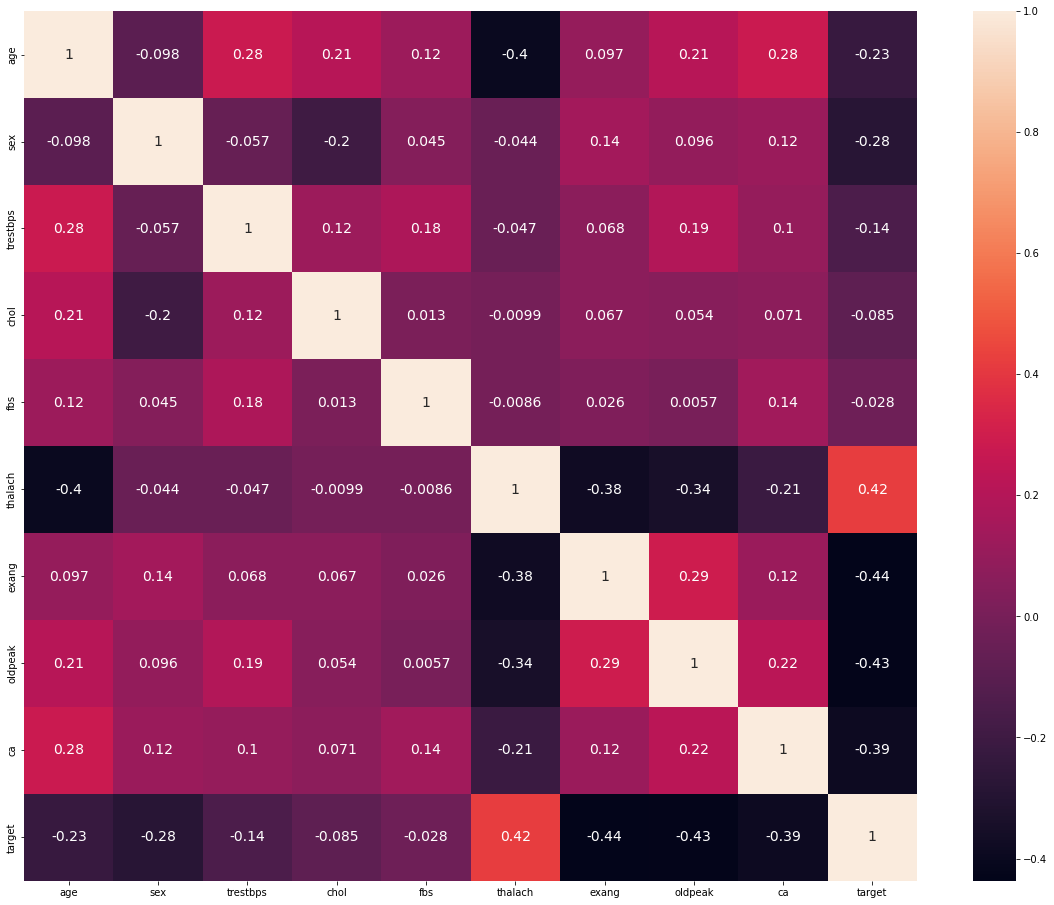

In [31]:
plt.rcParams["figure.figsize"] = (20,16)
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 14})


In [32]:
df.corr()[(df.corr()>= 0.9) & (df.corr() < 1)].any().any()

False

In [33]:
df.corr()[(df.corr()<= -0.9) & (df.corr() > -1)].any().any()

False

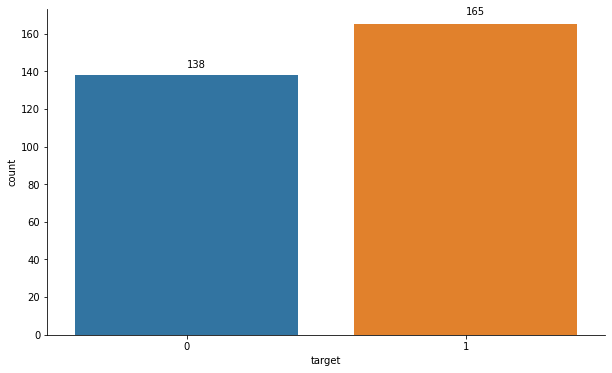

In [34]:
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.4, p.get_height() * 1.03));

In [35]:
numeric = []

for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)


['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


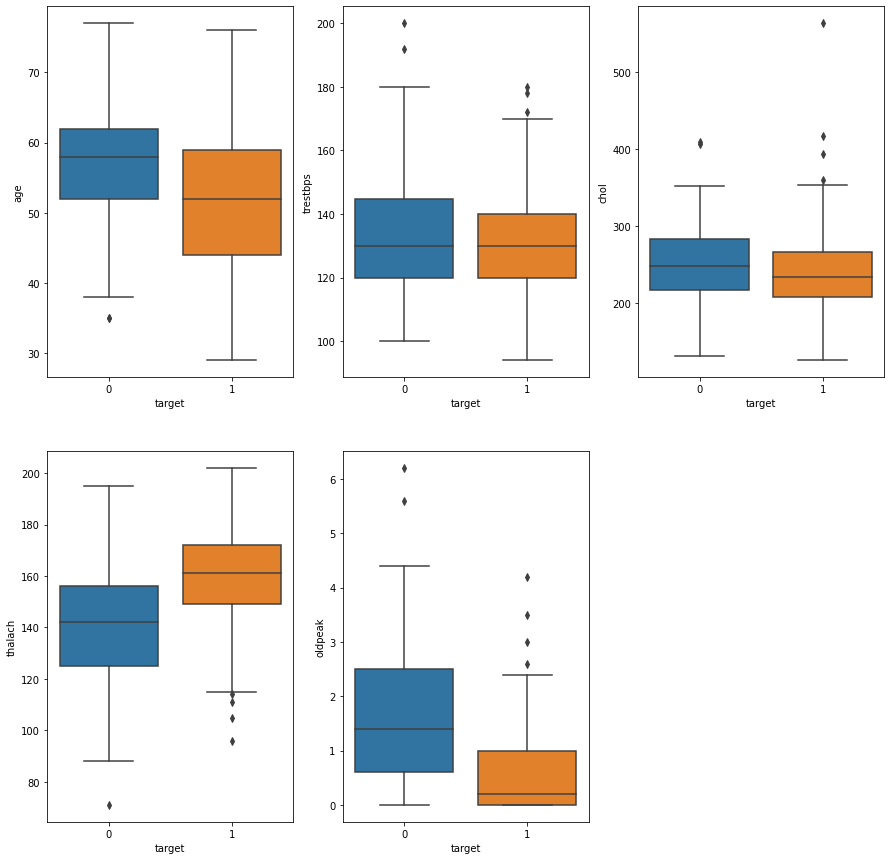

In [36]:
#   2. Visually examine numeric features for outlies with boxplot for each class
index = 0
plt.figure(figsize=(15,15))
for feature in numeric:
    if feature != "target":
        index += 1
        plt.subplot(2,3,index)
        sns.boxplot(x='target',y=feature,data=df)

<AxesSubplot:>

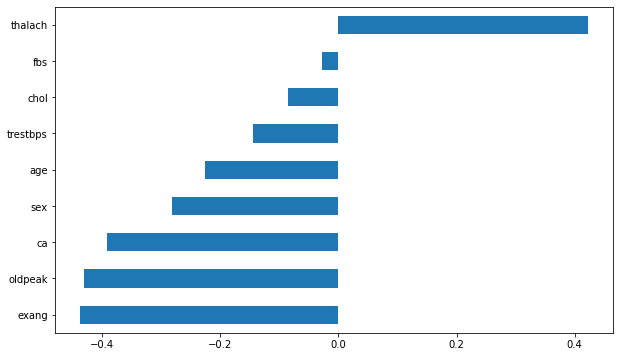

In [37]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["target"].drop("target").sort_values().plot.barh()

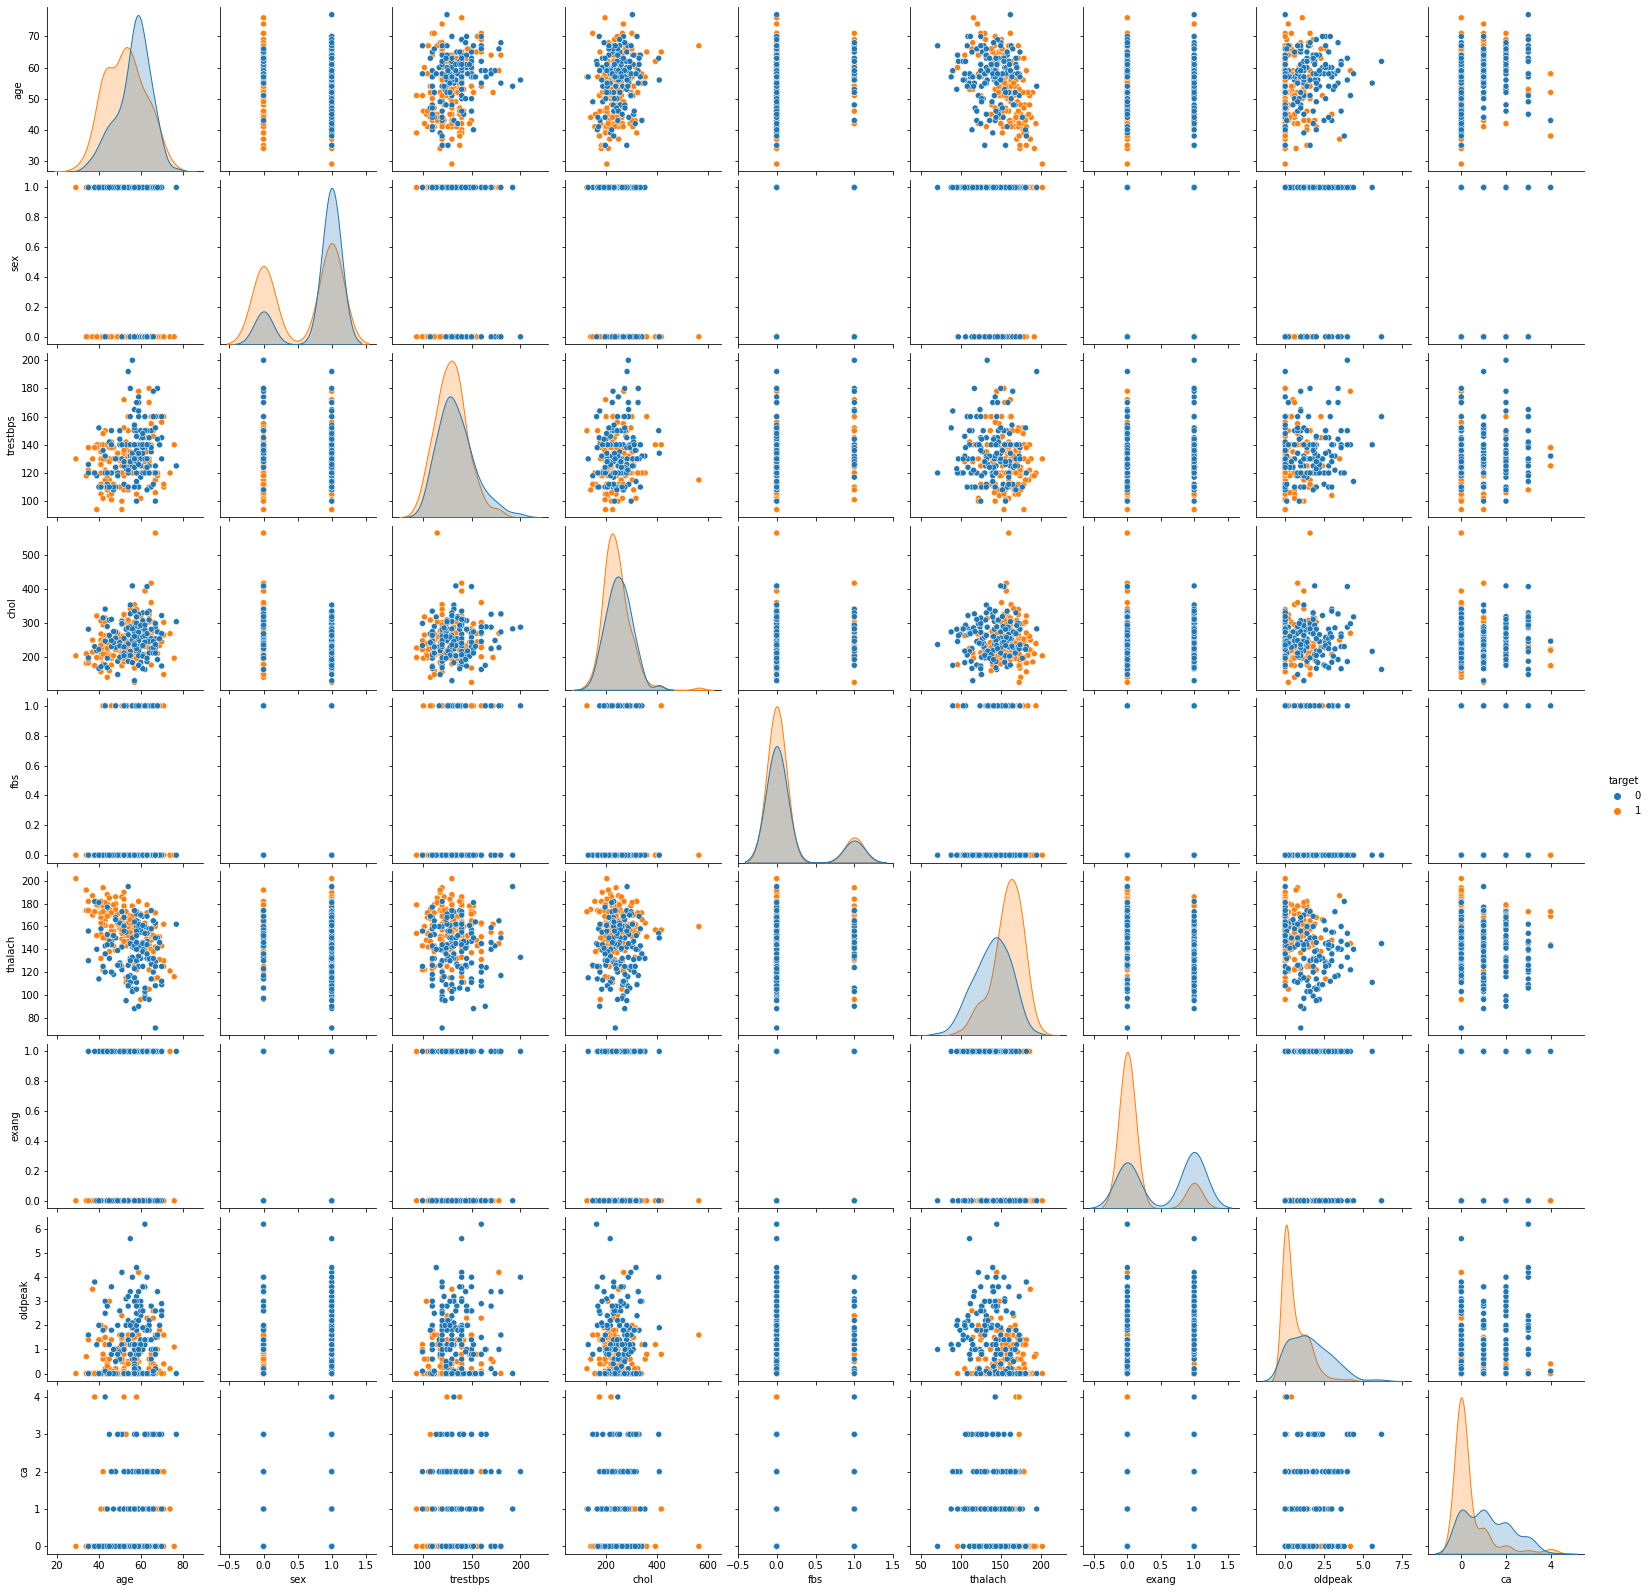

In [38]:
sns.pairplot(df.select_dtypes(include='number'), hue = "target")  # Blue:0

# Data Preprocessing

### Train | Test Split

In [39]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,1,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,1,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,0,0,1,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,0,1,0,0,1


In [40]:
X=df.drop("target", axis=1)
y=df["target"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

In [42]:
X_train.shape

(242, 18)

In [43]:
X_test.shape

(61, 18)

In [44]:
scaler = MinMaxScaler()

In [45]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()

In [48]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [50]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.27564908, 0.72435092],
       [0.73583357, 0.26416643],
       [0.46351264, 0.53648736],
       [0.02617373, 0.97382627],
       [0.83597512, 0.16402488],
       [0.07321957, 0.92678043],
       [0.03740065, 0.96259935],
       [0.14142446, 0.85857554],
       [0.0480011 , 0.9519989 ],
       [0.8514978 , 0.1485022 ],
       [0.24993536, 0.75006464],
       [0.83606971, 0.16393029],
       [0.15382003, 0.84617997],
       [0.83930972, 0.16069028],
       [0.63870024, 0.36129976],
       [0.04075533, 0.95924467],
       [0.06713717, 0.93286283],
       [0.09583361, 0.90416639],
       [0.27117996, 0.72882004],
       [0.4059893 , 0.5940107 ],
       [0.95501689, 0.04498311],
       [0.08675582, 0.91324418],
       [0.04346832, 0.95653168],
       [0.05173991, 0.94826009],
       [0.15554289, 0.84445711],
       [0.74914085, 0.25085915],
       [0.12758044, 0.87241956],
       [0.17787235, 0.82212765],
       [0.66717158, 0.33282842],
       [0.98507182, 0.01492818],
       [0.

In [52]:
test_data = pd.concat([X_test, y_test], axis=1) 
test_data["pred_proba"] = y_pred_proba[:,1]
test_data["pred"] = y_pred
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,target,pred_proba,pred
270,46,1,120,249,0,144,0,0.8,0,0,0,1,0,1,0,0,0,1,0,0.361300,0
227,35,1,120,198,0,130,1,1.6,0,0,0,1,0,0,1,0,0,1,0,0.148502,0
77,59,1,140,221,0,164,1,0.0,0,1,0,0,0,0,0,0,1,0,1,0.831953,1
129,74,0,120,269,0,121,1,0.2,1,1,0,0,0,1,0,0,1,0,1,0.750065,1
181,65,0,150,225,0,114,0,1.0,3,0,0,1,0,1,1,0,0,1,0,0.069887,0
114,55,1,130,262,0,155,0,0.0,0,1,0,0,0,0,0,0,1,0,1,0.932863,1
271,61,1,134,234,0,145,0,2.6,2,0,0,0,0,0,1,0,1,0,0,0.536487,1
130,54,0,160,201,0,163,0,0.0,1,0,1,0,0,0,0,0,1,0,1,0.951942,1
268,54,1,122,286,0,116,1,3.2,2,0,0,1,0,1,1,0,1,0,0,0.067876,0
69,62,0,124,209,0,163,0,0.0,0,0,0,1,0,0,0,0,1,0,1,0.872420,1


In [53]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [54]:
confusion_matrix(y_test,y_pred)

array([[22,  6],
       [ 3, 30]], dtype=int64)

In [55]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [56]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[22  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set
[[ 89  21]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.85      0.88      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242



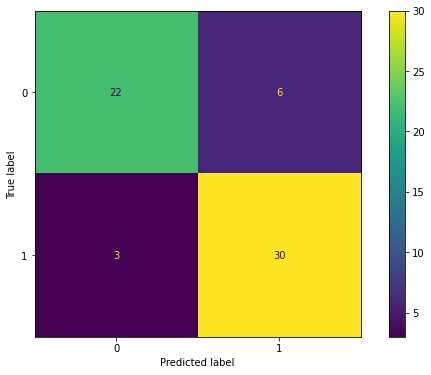

In [57]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

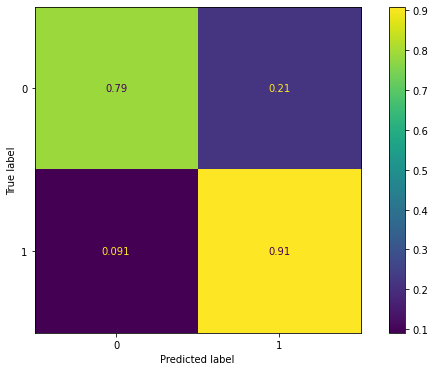

In [58]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

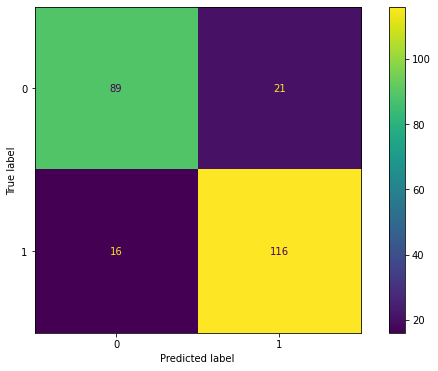

In [59]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## Cross Validate

In [60]:
from sklearn.model_selection import cross_validate

In [61]:
model = LogisticRegression(random_state=42)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.022999,0.008997,0.800000,0.764706,0.928571,0.838710
2,0.017996,0.007003,0.880000,0.866667,0.928571,0.896552
3,0.013001,0.006565,0.708333,0.714286,0.769231,0.740741
4,0.013786,0.005988,0.833333,0.909091,0.769231,0.833333
5,0.011125,0.005010,0.833333,0.909091,0.769231,0.833333
6,0.010000,0.004005,0.833333,0.800000,0.923077,0.857143
7,0.009996,0.007002,0.916667,0.923077,0.923077,0.923077
8,0.016999,0.002999,0.750000,0.733333,0.846154,0.785714
9,0.012573,0.002995,0.791667,0.833333,0.769231,0.800000
10,0.010601,0.002996,0.833333,0.846154,0.846154,0.846154


In [62]:
df_scores.mean()[2:]

test_accuracy     0.818000
test_precision    0.829974
test_recall       0.847253
test_f1           0.835476
dtype: float64

In [63]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Train Set

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.85      0.88      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242



## LogisticR GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=42)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


log_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [65]:
log_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [66]:
log_grid_model.best_params_

{'C': 0.42813323987193935,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [67]:
eval_metric(log_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[23  5]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.86      0.91      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set
[[ 91  19]
 [ 17 115]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       110
           1       0.86      0.87      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [68]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

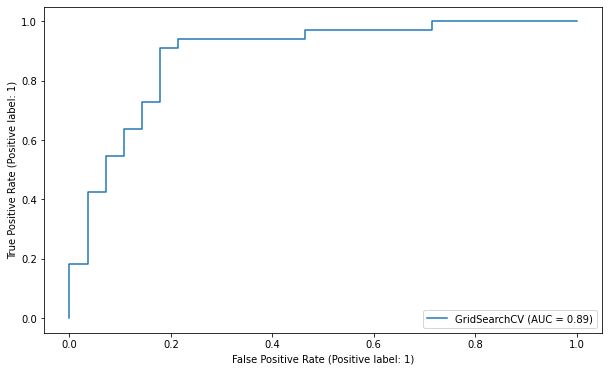

In [69]:
plot_roc_curve(log_grid_model, X_test_scaled, y_test);

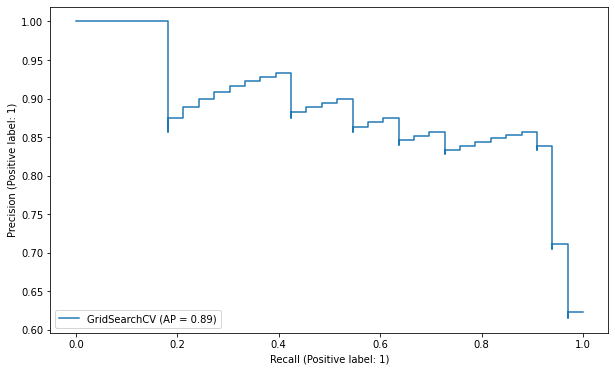

In [70]:
plot_precision_recall_curve(log_grid_model, X_test_scaled, y_test);

# Implement KNN and Evaluate

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=3, p=2, weights="distance")

In [73]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [74]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [75]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [76]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.374120,0.625880
1,1.000000,0.000000
2,0.692915,0.307085
3,0.000000,1.000000
4,0.692305,0.307695
...,...,...
56,0.000000,1.000000
57,0.000000,1.000000
58,0.185030,0.814970
59,0.000000,1.000000


# KNN Model Performance on Classification Tasks

In [77]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [78]:
confusion_matrix(y_test, y_pred)

array([[23,  5],
       [ 5, 28]], dtype=int64)

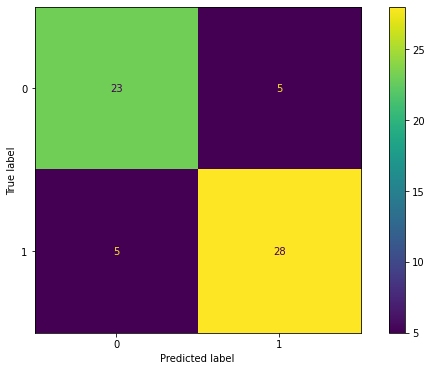

In [79]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [80]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23  5]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



Elbow Method for Choosing Reasonable K Values

In [81]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [82]:
test_error_rates = [] 


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

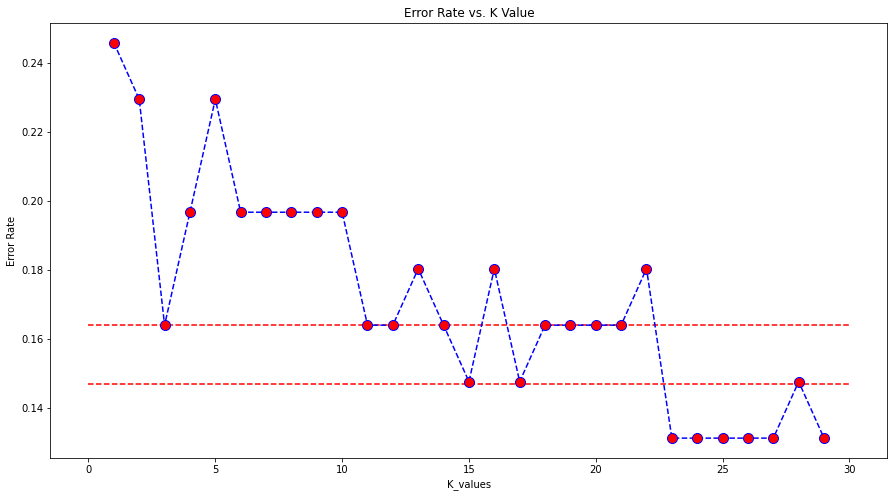

In [83]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.147, xmin = 0, xmax = 30, colors= 'r', linestyles="--");

Scores by Various K Values

In [84]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled,y_train)
print('WITH K=3\n') 
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=3

Test_Set

[[23  5]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Train_Set

[[ 94  16]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.88      0.93      0.91       132

    accuracy                           0.90       242
   macro avg       0.90      0.89      0.90       242
weighted avg       0.90      0.90      0.90       242



In [86]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
print('WITH K=6\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=6

Test_Set

[[22  6]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Train_Set

[[ 92  18]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       110
           1       0.87      0.88      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [87]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[22  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set

[[ 85  25]
 [ 20 112]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       110
           1       0.82      0.85      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



Cross Validate For Optimal K Value

In [88]:
from sklearn.model_selection import cross_val_score, cross_validate

In [89]:
model = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002000,0.009004,0.800000,0.800000,0.857143,0.827586
2,0.001982,0.012001,0.840000,0.812500,0.928571,0.866667
3,0.002000,0.009003,0.750000,0.769231,0.769231,0.769231
4,0.002006,0.010994,0.708333,0.800000,0.615385,0.695652
5,0.002000,0.013992,0.833333,0.909091,0.769231,0.833333
6,0.001000,0.014003,0.875000,0.857143,0.923077,0.888889
7,0.001997,0.011000,0.916667,0.923077,0.923077,0.923077
8,0.001000,0.014006,0.833333,0.846154,0.846154,0.846154
9,0.002996,0.013410,0.750000,0.705882,0.923077,0.800000
10,0.000999,0.007999,0.833333,0.846154,0.846154,0.846154


In [90]:
df_scores.mean()[2:]

test_accuracy     0.814000
test_precision    0.826923
test_recall       0.840110
test_f1           0.829674
dtype: float64

Gridsearch Method for Choosing Reasonable K Values

In [91]:
from sklearn.model_selection import GridSearchCV 

In [92]:
knn_grid = KNeighborsClassifier()

In [93]:
k_values= range(1,30)

In [94]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [95]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [96]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:
knn_grid_model.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

In [98]:
print('WITH K=7\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set

[[21  7]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



 Evaluating ROC Curves and AUC

In [100]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [101]:
knn_model = KNeighborsClassifier(n_neighbors=9, weights="distance").fit(X_train_scaled, y_train)

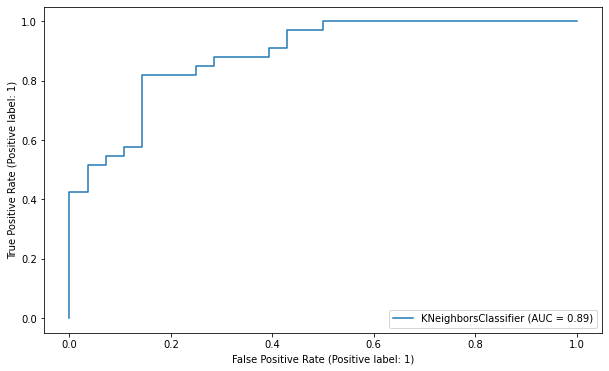

In [102]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [103]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8874458874458875

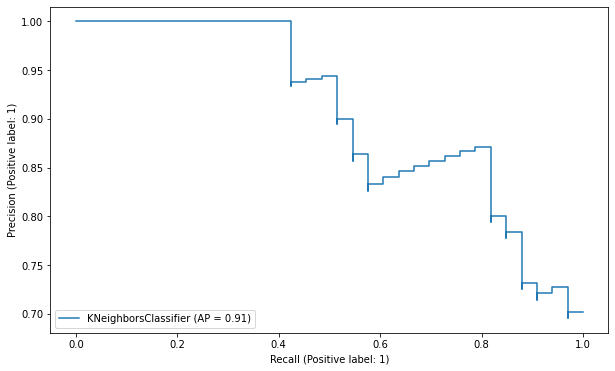

In [104]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

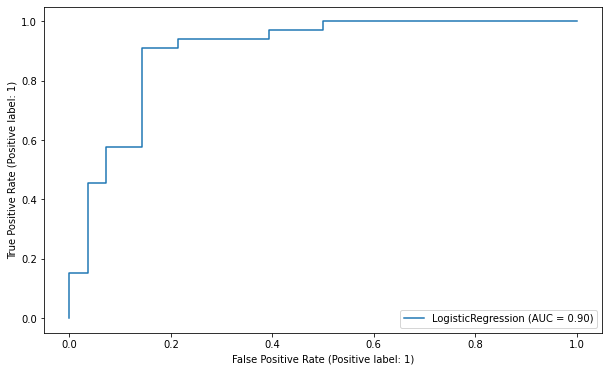

In [105]:
plot_roc_curve(log_model, X_test_scaled, y_test);

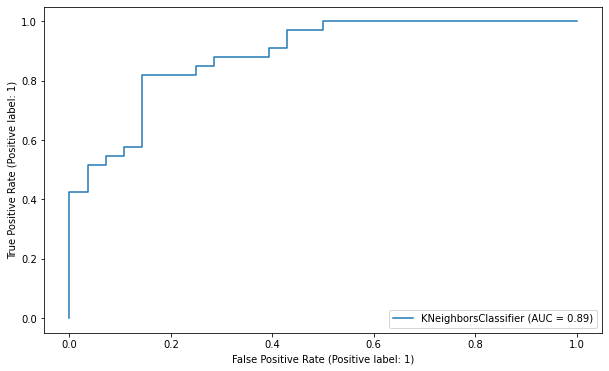

In [106]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [107]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[22  6]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Train_Set

[[ 89  21]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.85      0.88      0.86       132

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242



In [108]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[23  5]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



# Chose best model and make a random prediction 

Log modelimin metrikleri daha iyi ve tutarlı olduğu için log modeli kullanacağım. ROC 0.90, 9 hata

Final Model and Model Deployment

In [109]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [110]:
model = LogisticRegression(random_state=42)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


final_log_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "accuracy",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [111]:
final_log_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [112]:
final_log_model.best_estimator_

LogisticRegression(C=3.79269019073225, random_state=42, solver='liblinear')

In [113]:
my_dict = {"age": [63, 90, 86],
           "sex": [1, 1, 1],
           "cp": [1, 2, 3],
           "trestbps": [145, 250, 380],
           "chol": [233, 650, 450],
           "fbs": [1, 1, 1],
           "restecg": [0, 1, 2],
           "thalach": [150, 180, 150],
           "exang": [0, 0, 0],
           "oldpeak": [2.3, 2.4, 1],
           "slope": [0, 1, 2],
           "ca": [0, 0, 0],
           "thal": [0, 1, 2]
          }

In [114]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,0,150,0,2.3,0,0,0
1,90,1,2,250,650,1,1,180,0,2.4,1,0,1
2,86,1,3,380,450,1,2,150,0,1.0,2,0,2


In [115]:
sample['cp']=sample['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [116]:
sample['restecg']=sample['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [117]:
sample['slope']=sample['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

In [118]:
sample.thal = sample.thal.map({0:np.nan, 2:'normal' , 1:'fixed defect' , 3:'reversable defect'})

In [119]:
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,atypical angina,145,233,1,normal,150,0,2.3,upsloping,0,NaN
1,90,1,non-anginal pain,250,650,1,having ST-T wave abnormality,180,0,2.4,flat,0,fixed defect
2,86,1,asymptomatic,380,450,1,left ventricular hypertrophy,150,0,1.0,downsloping,0,normal


In [120]:
sample=pd.get_dummies(sample)
sample.T

,0,1,2
age,63.0,90.0,86.0
sex,1.0,1.0,1.0
trestbps,145.0,250.0,380.0
chol,233.0,650.0,450.0
fbs,1.0,1.0,1.0
thalach,150.0,180.0,150.0
exang,0.0,0.0,0.0
oldpeak,2.3,2.4,1.0
ca,0.0,0.0,0.0
cp_asymptomatic,0.0,0.0,1.0


In [121]:
sample= sample.reindex(columns = X.columns, fill_value=0)
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0
1,90,1,250,650,1,180,0,2.4,0,0,1,0,0,0,1,0,0,0
2,86,1,380,450,1,150,0,1.0,0,0,0,0,1,0,0,0,1,0


In [122]:
sample = final_scaler.transform(sample)
sample

array([[0.70833333, 1.        , 0.48113208, 0.24429224, 1.        ,
        0.60305344, 0.        , 0.37096774, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        ],
       [1.27083333, 1.        , 1.47169811, 1.19634703, 1.        ,
        0.83206107, 0.        , 0.38709677, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [1.1875    , 1.        , 2.69811321, 0.73972603, 1.        ,
        0.60305344, 0.        , 0.16129032, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [123]:
final_log_model.predict(sample)

array([1, 0, 0], dtype=int64)

## Predict New Observations- 2 Alternatif- pickle

In [124]:
final_scaler = MinMaxScaler().fit(X) 

In [125]:
import pickle
pickle.dump(final_scaler, open("scaler_hearts", 'wb')) 

In [126]:
X_scaled=final_scaler.transform(X)

In [127]:
log_final_model = LogisticRegression(C= 0.42, class_weight= 'balanced',penalty= 'l1',solver= 'liblinear').fit(X_scaled, y)

In [128]:
pickle.dump(log_final_model, open("final_model_hearts", 'wb'))

In [129]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
cp_atypical angina,303.0,0.165017,0.371809,0.0,0.0,0.0,0.0,1.0


In [130]:
my_dict = {"age": [63, 90, 86],
           "sex": [1, 1, 1],
           "cp": [1, 2, 3],
           "trestbps": [145, 250, 380],
           "chol": [233, 650, 450],
           "fbs": [1, 1, 1],
           "restecg": [0, 1, 2],
           "thalach": [150, 180, 150],
           "exang": [0, 0, 0],
           "oldpeak": [2.3, 2.4, 1],
           "slope": [0, 1, 2],
           "ca": [0, 0, 0],
           "thal": [0, 1, 2]
          }

In [131]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,0,150,0,2.3,0,0,0
1,90,1,2,250,650,1,1,180,0,2.4,1,0,1
2,86,1,3,380,450,1,2,150,0,1.0,2,0,2


In [132]:
scaler_hearts = pickle.load(open("scaler_hearts", "rb")) 
scaler_hearts

MinMaxScaler()

In [133]:
sample['cp']=sample['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [134]:
sample['restecg']=sample['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [135]:
sample['slope']=sample['slope'].replace({0:'upsloping',1:'flat',2:'downsloping'})

In [136]:
sample.thal = sample.thal.map({0:np.nan, 2:'normal' , 1:'fixed defect' , 3:'reversable defect'})

In [137]:
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,atypical angina,145,233,1,normal,150,0,2.3,upsloping,0,NaN
1,90,1,non-anginal pain,250,650,1,having ST-T wave abnormality,180,0,2.4,flat,0,fixed defect
2,86,1,asymptomatic,380,450,1,left ventricular hypertrophy,150,0,1.0,downsloping,0,normal


In [138]:
sample=pd.get_dummies(sample)
sample.T

,0,1,2
age,63.0,90.0,86.0
sex,1.0,1.0,1.0
trestbps,145.0,250.0,380.0
chol,233.0,650.0,450.0
fbs,1.0,1.0,1.0
thalach,150.0,180.0,150.0
exang,0.0,0.0,0.0
oldpeak,2.3,2.4,1.0
ca,0.0,0.0,0.0
cp_asymptomatic,0.0,0.0,1.0


In [139]:
sample= sample.reindex(columns = X.columns, fill_value=0)
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0
1,90,1,250,650,1,180,0,2.4,0,0,1,0,0,0,1,0,0,0
2,86,1,380,450,1,150,0,1.0,0,0,0,0,1,0,0,0,1,0


In [140]:
sample_scaled = final_scaler.transform(sample)
sample_scaled

array([[0.70833333, 1.        , 0.48113208, 0.24429224, 1.        ,
        0.60305344, 0.        , 0.37096774, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        ],
       [1.27083333, 1.        , 1.47169811, 1.19634703, 1.        ,
        0.83206107, 0.        , 0.38709677, 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        ],
       [1.1875    , 1.        , 2.69811321, 0.73972603, 1.        ,
        0.60305344, 0.        , 0.16129032, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [141]:
final_log_model = pickle.load(open("final_model_hearts", "rb"))

In [142]:
predictions = final_log_model.predict(sample_scaled)
predictions_proba = final_log_model.predict_proba(sample_scaled)

In [143]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,pred_proba,pred_0.50
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,1,0,1,0,0,0.498057,0
1,90,1,250,650,1,180,0,2.4,0,0,1,0,0,0,1,0,0,0,0.597653,1
2,86,1,380,450,1,150,0,1.0,0,0,0,0,1,0,0,0,1,0,0.865789,1
